In [2]:
from pandas import DataFrame
import pandas
import numpy as np

In [3]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [4]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

dataset = read_csv('data/pm2.5_non_normalised.csv', header=0, index_col=0)

In [5]:
loaded_scores = np.load('CNN_scores.npy')
CNN_scores = loaded_scores[loaded_scores[:, 0].argsort()]

loaded_scores = np.load('MLP_scores.npy')
MLP_scores = loaded_scores[loaded_scores[:, 0].argsort()]

loaded_scores = np.load('LSTM_scores.npy')
LSTM_scores = loaded_scores[loaded_scores[:, 0].argsort()]

In [6]:
def get_name(score):
    name = ''
    for parameter in score[1:]:
        name += str(int(parameter)) + '_'
    return name[:-1]

In [9]:
import keras
CNN_name = get_name(CNN_scores[0])
CNN_yhat = np.load('CNN_runtime/yhat/' + CNN_name + '.npy')
CNN_test_y = np.load('CNN_runtime/test_y/' + CNN_name + '.npy')
CNN_model = keras.models.load_model('CNN_runtime/model/' + CNN_name)
CNN_history = np.load('CNN_runtime/history/' + CNN_name + '.npy', allow_pickle=True)

MLP_name = get_name(MLP_scores[0][1:])
MLP_yhat = np.load('MLP_runtime/yhat/' + MLP_name + '.npy')[1:]
MLP_test_y = np.load('MLP_runtime/test_y/' + MLP_name + '.npy')[1:]
MLP_model = keras.models.load_model('MLP_runtime/model/' + MLP_name + '.h5')
MLP_history = np.load('MLP_runtime/history/' + MLP_name + '.npy', allow_pickle=True)

LSTM_name = get_name(LSTM_scores[0])
LSTM_yhat = np.load('LSTM_runtime/yhat/' + LSTM_name + '.npy')
LSTM_test_y = np.load('LSTM_runtime/test_y/' + LSTM_name + '.npy')
LSTM_model = keras.models.load_model('LSTM_runtime/model/' + LSTM_name + '.h5')
LSTM_history = np.load('LSTM_runtime/history/' + LSTM_name + '.npy', allow_pickle=True)

W1110 21:58:15.672219 140018560501568 deprecation.py:323] From /home/acs-lab/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
from matplotlib import pyplot
CNN_history = np.load('CNN_runtime/history/' + CNN_name + '.npy', allow_pickle=True).item()
history = CNN_history

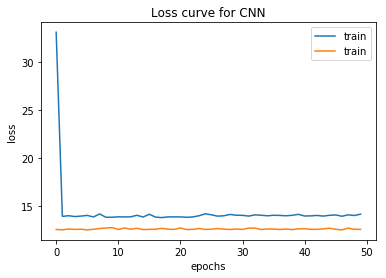

In [23]:
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'train')
pyplot.xlabel("epochs")
pyplot.ylabel("loss")
pyplot.title("Loss curve for CNN")
pyplot.legend()
pyplot.show()

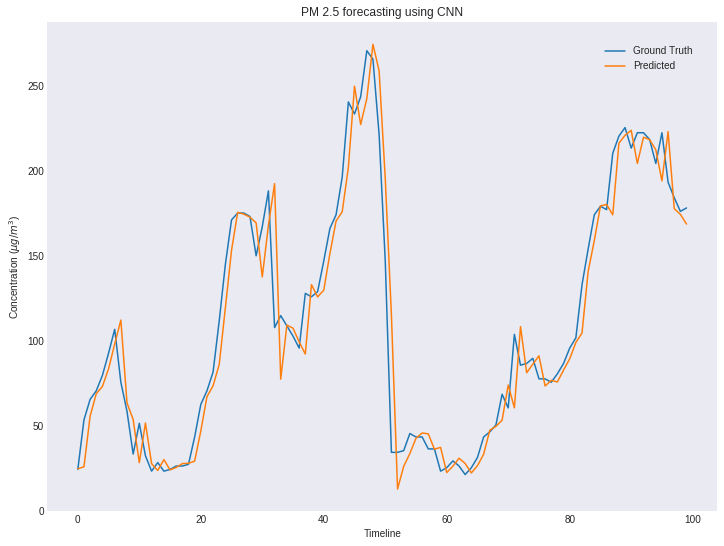

In [28]:
import matplotlib.pyplot as plt

plt.plot(CNN_test_y[:100], label="Ground Truth")
plt.plot(CNN_yhat[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using CNN")

plt.show()

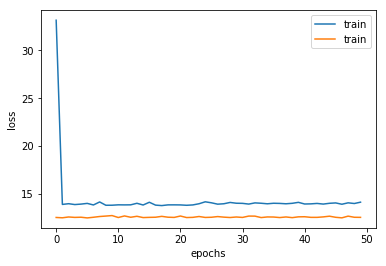

In [22]:
history = MLP_history.item()
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'train')
pyplot.xlabel("epochs")
pyplot.ylabel("loss")
pyplot.title("Loss curve for MLP")
pyplot.legend()
pyplot.show()

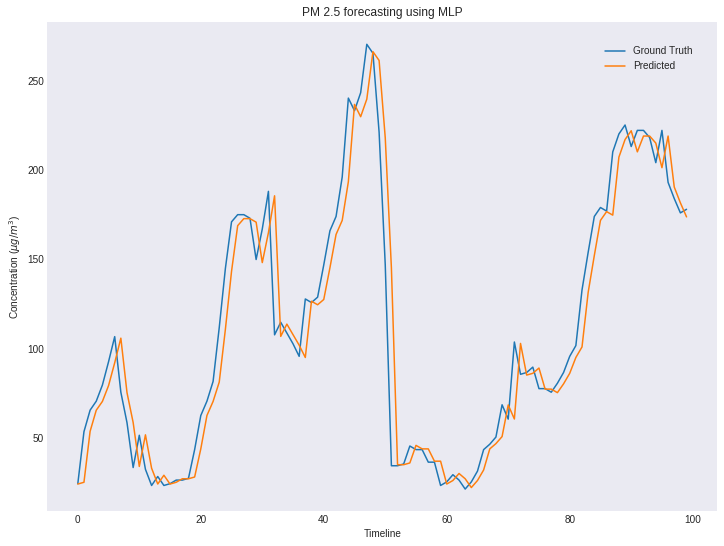

In [27]:
import matplotlib.pyplot as plt

plt.plot(MLP_test_y[:100], label="Ground Truth")
plt.plot(MLP_yhat[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using MLP")

plt.show()

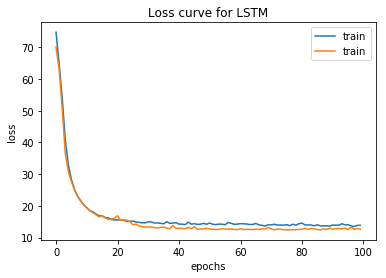

In [24]:
history = LSTM_history.item()
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'train')
pyplot.xlabel("epochs")
pyplot.ylabel("loss")
pyplot.title("Loss curve for LSTM")
pyplot.legend()
pyplot.show()

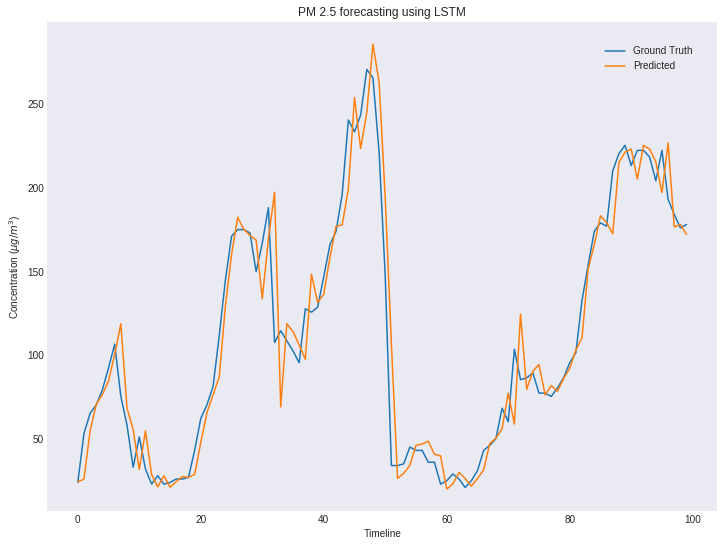

In [26]:
import matplotlib.pyplot as plt

plt.plot(LSTM_test_y[:100], label="Ground Truth")
plt.plot(LSTM_yhat[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using LSTM")

plt.show()

In [31]:
print(CNN_scores[0])
print(MLP_scores[0])
print(LSTM_scores[0])

[23.49495876  5.         16.          3.          4.         25.        ]
[600.97588059  24.51480941   1.           6.          32.        ]
[623.38726348   5.         100.           8.        ]


In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
CNN_lookback_period = (int)(CNN_scores[0][1])
CNN_values = series_to_supervised(dataset, CNN_lookback_period, 1).values

n_train_hours = (int)(0.8 * len(CNN_values))
train = CNN_values[:n_train_hours, :]
test = CNN_values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], CNN_lookback_period, 1))
test_X = test_X.reshape((test_X.shape[0], CNN_lookback_period, 1))

CNN_predicted_train_y = CNN_model.predict(train_X)

print(sqrt(mean_squared_error(train_y, CNN_predicted_train_y)))
print(train_y.shape)
print(CNN_predicted_train_y.shape)

26.495948887436718
(35035,)
(35035, 1)


In [31]:
MLP_lookback_period = (int)(MLP_scores[0][2])
MLP_values = series_to_supervised(dataset, MLP_lookback_period, 1).values

n_train_hours = (int)(0.8 * len(MLP_values))
train = MLP_values[:n_train_hours, :]
test = MLP_values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], MLP_lookback_period))
test_X = test_X.reshape((test_X.shape[0], MLP_lookback_period))

MLP_predicted_train_y = MLP_model.predict(train_X)

print(sqrt(mean_squared_error(train_y, MLP_predicted_train_y)))
print(train_y.shape)
print(MLP_predicted_train_y.shape)

28.25357163474797
(35038,)
(35038, 1)


In [32]:
LSTM_lookback_period = (int)(LSTM_scores[0][1])
LSTM_values = series_to_supervised(dataset, LSTM_lookback_period, 1).values

n_train_hours = (int)(0.8 * len(LSTM_values))
train = LSTM_values[:n_train_hours, :]
test = LSTM_values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], LSTM_lookback_period, 1))
test_X = test_X.reshape((test_X.shape[0], LSTM_lookback_period, 1))

LSTM_predicted_train_y = LSTM_model.predict(train_X)

print(sqrt(mean_squared_error(train_y, LSTM_predicted_train_y)))
print(train_y.shape)
print(LSTM_predicted_train_y.shape)

27.28175535282726
(35035,)
(35035, 1)


In [33]:
LSTM_predicted_train_y =  LSTM_predicted_train_y[:-1]
CNN_predicted_train_y = CNN_predicted_train_y[:-1]
MLP_predicted_train_y = MLP_predicted_train_y[4:]
train_y = train_y[:-1]
print(train_y)
print(LSTM_predicted_train_y.shape)
print(CNN_predicted_train_y.shape)
print(MLP_predicted_train_y.shape)

[109.65794  105.6338   124.74848  ...  18.108651  23.138832  20.120723]
(35034, 1)
(35034, 1)
(35034, 1)


In [34]:
intervals = [float(i)/100 for i in range(101)]
scores = list()

for alpha in intervals:
    for beta in [float(x)/100 for x in range(int(100 - alpha * 100 + 1))]:
        gamma = round(1 - alpha - beta, 2)
        yhat = alpha * CNN_predicted_train_y + beta * MLP_predicted_train_y + gamma * LSTM_predicted_train_y
        rmse = sqrt(mean_squared_error(yhat, train_y))
        scores.append([rmse, alpha, beta, gamma])
        
scores.sort(key = lambda tup : tup[0])
print(scores)

[[26.16616588308138, 0.58, 0.06, 0.36], [26.166282711976436, 0.57, 0.07, 0.36], [26.16632246786477, 0.59, 0.06, 0.35], [26.16640343577926, 0.59, 0.05, 0.36], [26.1664808919061, 0.6, 0.05, 0.35], [26.166518602950127, 0.58, 0.07, 0.35], [26.16654426836494, 0.57, 0.06, 0.37], [26.166581817951034, 0.56, 0.07, 0.37], [26.16675394600043, 0.56, 0.08, 0.36], [26.166861090485607, 0.58, 0.05, 0.37], [26.16697367866092, 0.55, 0.08, 0.37], [26.166993560770397, 0.61, 0.04, 0.35], [26.166995547015073, 0.6, 0.04, 0.36], [26.167014049883246, 0.6, 0.06, 0.34], [26.167069092995167, 0.57, 0.08, 0.35], [26.1670931227143, 0.61, 0.05, 0.34], [26.167289247349682, 0.59, 0.07, 0.34], [26.16741578951321, 0.55, 0.07, 0.38], [26.16745752054622, 0.56, 0.06, 0.38], [26.16752631039248, 0.62, 0.04, 0.34], [26.167532286353154, 0.59, 0.04, 0.37], [26.16757948114556, 0.55, 0.09, 0.36], [26.167719866040237, 0.54, 0.09, 0.37], [26.16772835156698, 0.54, 0.08, 0.38], [26.16785369111672, 0.57, 0.05, 0.38], [26.16786045482044

In [35]:
np.save('Ensemble_scores_trained.npy', scores)

alpha = scores[0][1]
beta = scores[0][2]
gamma = scores[0][3]
print(alpha, beta, gamma) 

yhat = alpha * CNN_yhat + beta * MLP_yhat + gamma * LSTM_yhat

rmse = sqrt(mean_squared_error(yhat, CNN_test_y))

print(rmse)

0.58 0.06 0.36
23.458760602120456


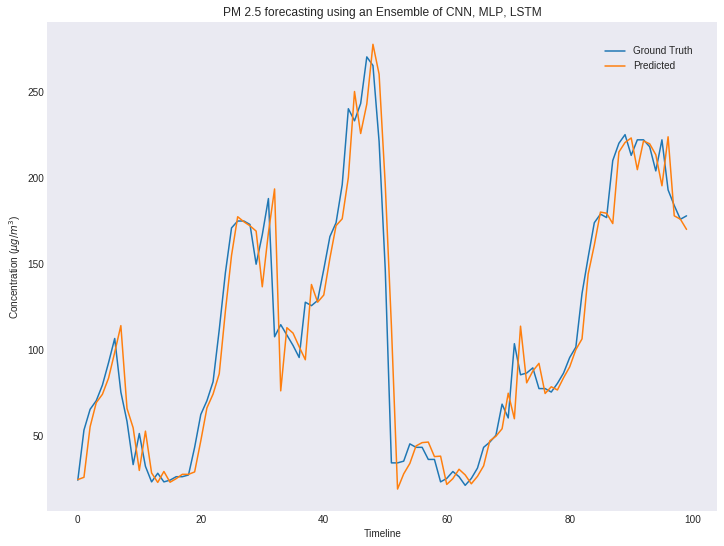

In [36]:
import matplotlib.pyplot as plt

plt.plot(CNN_test_y[:100], label="Ground Truth")
plt.plot(yhat[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using an Ensemble of CNN, MLP, LSTM")

plt.show()